In [253]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [254]:
#epsilon = 7.5, MinPts = 3
df = pd.read_csv('dbscan.csv')
df.head()

,cluster,pt,x,y,num_neighbors,neighbors
0,NaN,0,51.418089,13.593610,2,"0,27"
1,NaN,1,39.132318,-4.419204,3,"1,40,75"
2,NaN,2,47.807515,-25.822561,1,2
3,NaN,3,27.699703,53.434193,1,3
4,NaN,4,39.860995,5.676871,3,"4,56,75"


Text(0.5, 1.0, 'Scattered data')

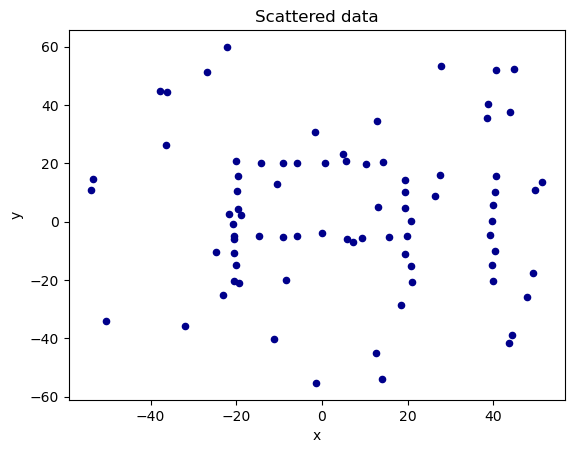

In [255]:
df.plot.scatter(x='x', y='y', c='DarkBlue')
plt.title("Scattered data")

In [256]:
num_neighbor_list = dict()
for index,rows in df.iterrows():
    if rows.num_neighbors in num_neighbor_list:
        num_neighbor_list[rows['num_neighbors']].append(rows['pt'])
    else:
        temp_list = []
        temp_list.append(rows['pt'])
        num_neighbor_list[rows['num_neighbors']] = temp_list

In [257]:
num_neighbor_list

{2: [0, 12, 13, 21, 27, 31, 35, 43, 47, 48, 51, 55, 59, 62, 64, 66, 67, 77],
 3: [1, 4, 5, 6, 9, 11, 14, 17, 19, 22, 26, 28, 33, 40, 53, 56, 75, 76, 78],
 1: [2, 3, 7, 15, 18, 23, 24, 36, 41, 44, 57, 58, 61, 65, 73, 79],
 5: [8, 32, 38, 39, 50, 68, 70],
 4: [10, 16, 20, 25, 29, 30, 34, 37, 42, 45, 46, 49, 52, 54, 69, 71, 74],
 6: [60],
 7: [63, 72]}

In [258]:
neighbors_list = [[int(item) for item in each.split(",")]
                      for each in df["neighbors"].tolist()]
dbscan_dict = dict(zip(df["pt"], neighbors_list))
dbscan_dict

{0: [0, 27],
 1: [1, 40, 75],
 2: [2],
 3: [3],
 4: [4, 56, 75],
 5: [5, 70, 74],
 6: [6, 14, 42],
 7: [7],
 8: [8, 11, 60, 63, 72],
 9: [9, 33, 78],
 10: [10, 22, 39, 71],
 11: [8, 11, 14],
 12: [12, 28],
 13: [13, 51],
 14: [6, 11, 14],
 15: [15],
 16: [16, 29, 46, 48],
 17: [17, 20, 42],
 18: [18],
 19: [19, 54, 74],
 20: [17, 20, 38, 42],
 21: [21, 76],
 22: [10, 22, 71],
 23: [23],
 24: [24],
 25: [25, 26, 54, 67],
 26: [25, 26, 34],
 27: [0, 27],
 28: [12, 28, 40],
 29: [16, 29, 34, 46],
 30: [30, 38, 45, 52],
 31: [31, 49],
 32: [32, 63, 69, 70, 72],
 33: [9, 33, 78],
 34: [26, 29, 34, 46],
 35: [35, 62],
 36: [36],
 37: [37, 38, 45, 53],
 38: [20, 30, 37, 38, 45],
 39: [10, 39, 50, 68, 71],
 40: [1, 28, 40],
 41: [41],
 42: [6, 17, 20, 42],
 43: [43, 59],
 44: [44],
 45: [30, 37, 38, 45],
 46: [16, 29, 34, 46],
 47: [47, 53],
 48: [16, 48],
 49: [31, 49, 52, 76],
 50: [39, 50, 60, 63, 68],
 51: [13, 51],
 52: [30, 49, 52, 64],
 53: [37, 47, 53],
 54: [19, 25, 54, 74],
 55: [55,

In [259]:
def defining_points(MinPts,num_neighbor_list):
    cores, non_cores, outliers = list(), list(), list()
    
    [cores.extend(num_neighbor_list[i])
     for i in num_neighbor_list if i >= MinPts]
    
    [non_cores.extend(num_neighbor_list[i])
     for i in num_neighbor_list if i < MinPts and i > 1]
    
    [outliers.extend(num_neighbor_list[i])
     for i in num_neighbor_list if i == 1]
    
    return cores,non_cores,outliers

In [260]:
cores,non_cores,outliers = defining_points(3,num_neighbor_list)

In [261]:
print(cores)

[1, 4, 5, 6, 9, 11, 14, 17, 19, 22, 26, 28, 33, 40, 53, 56, 75, 76, 78, 8, 32, 38, 39, 50, 68, 70, 10, 16, 20, 25, 29, 30, 34, 37, 42, 45, 46, 49, 52, 54, 69, 71, 74, 60, 63, 72]


In [262]:
print(non_cores)

[0, 12, 13, 21, 27, 31, 35, 43, 47, 48, 51, 55, 59, 62, 64, 66, 67, 77]


In [263]:
print(outliers)

[2, 3, 7, 15, 18, 23, 24, 36, 41, 44, 57, 58, 61, 65, 73, 79]


In [264]:
def cluster_with_stack(eps, minPts, df):
    
    #initiating cluster number
    C = 1
    #initiating stacks to maintain
    current_stack = set()
    unvisited = list(df.index)
    clusters = []
    
    
    while (len(unvisited) != 0): #run until all points have been visited

        #identifier for first point of a cluster
        first_point = True
        
        #choose a random unvisited point
        current_stack.add(random.choice(unvisited))
        
        while len(current_stack) != 0: #run until a cluster is complete
            
            #pop current point from stack
            curr_idx = current_stack.pop()
            
            #check if point iscore, neighbour or border
            if curr_idx in cores:
                iscore = True
                isborder = False
                isnoise = False
            
            if curr_idx in non_cores:
                iscore = False
                isborder = True
                isnoise = False 
                
            if curr_idx in outliers:
                iscore = False
                isborder = False
                isnoise = True 
                
            neigh_indexes = dbscan_dict[curr_idx]
            #dealing with an edge case
            if (isborder & first_point):
                #for first border point, we label it aand its neighbours as noise 
                clusters.append((curr_idx, 0))
                clusters.extend(list(zip(neigh_indexes,[0 for _ in range(len(neigh_indexes))])))
                
                #label as visited
                unvisited.remove(curr_idx)
                unvisited = [e for e in unvisited if e not in neigh_indexes]
    
                continue
                
            unvisited.remove(curr_idx) #remove point from unvisited list
            
            
            neigh_indexes = set(neigh_indexes) & set(unvisited) #look at only unvisited points
            
            if iscore: #if current point is a core
                first_point = False
                
                clusters.append((curr_idx,C)) #assign to a cluster
                current_stack.update(neigh_indexes) #add neighbours to a stack

            elif isborder: #if current point is a border point
                clusters.append((curr_idx,C))
                
                continue

            elif isnoise: #if current point is noise
                clusters.append((curr_idx, 0))
                
                continue
                
        if not first_point:
            #increment cluster number
            C+=1
        
    return clusters

In [265]:
eps = 7.5
#minimum neighbouring points set to 3
minPts = 3

data = pd.read_csv("dbscan.csv", usecols = ['x','y'] )
#data
clustered = cluster_with_stack(eps, minPts, data)

idx , cluster = list(zip(*clustered))
cluster_df = pd.DataFrame(clustered, columns = ["pt", "cluster"])

cluster_df


,pt,cluster
0,28,1
1,12,1
2,40,1
3,1,1
4,75,1
...,...,...
80,59,0
81,43,0
82,59,0
83,58,0


In [266]:
merged_df = pd.merge(df, cluster_df, on ='pt')

In [267]:
merged_df

,cluster_x,pt,x,y,num_neighbors,neighbors,cluster_y
0,NaN,0,51.418089,13.593610,2,"0,27",0
1,NaN,1,39.132318,-4.419204,3,"1,40,75",1
2,NaN,2,47.807515,-25.822561,1,2,0
3,NaN,3,27.699703,53.434193,1,3,0
4,NaN,4,39.860995,5.676871,3,"4,56,75",1
...,...,...,...,...,...,...,...
80,NaN,75,39.659047,0.230178,3,"1,4,75",1
81,NaN,76,26.366491,8.798826,3,"21,49,76",2
82,NaN,77,-36.184060,44.292045,2,"55,77",0
83,NaN,78,44.012085,37.729478,3,"9,33,78",3


<Figure size 1000x700 with 0 Axes>

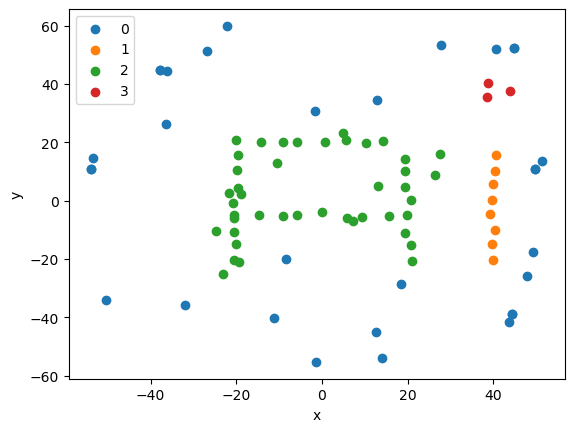

In [268]:
plt.figure(figsize=(10,7))

fig, ax = plt.subplots()

for cluster, df_cluster in merged_df.groupby('cluster_y'):
    ax.scatter(df_cluster['x'], df_cluster['y'], label=cluster)

ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()
    

In [269]:
# t_p = []
# for key in dbscan_dict.keys():
#     print('key - ',key)
#     if key in t_p:
#         x = 1
#         print('already traversed')
#     else:
#         t_p.append(key)
#         neighbors = dbscan_dict[key]
#         print('neighbors - ')
#         for neighbor in neighbors:
#             if neighbor in t_p:
#                 continue
#             else:
#                 print(neighbor)
#                 t_p.append(neighbor)

In [270]:
# clusters = []

# for i in dbscan_dict:
#     if i in cores:
#         flag = 0
#         for cls in clusters:
#             if i in cls:
#                 flag += 1 
#             continue
#         if flag == 0:
#             clusters.append([i])
            
            
        
    